In [17]:
#importing required Libraries
import pandas as pd   #to create dataframe
import requests       #to send the request to the URL
from bs4 import BeautifulSoup #to get the content in the form of HTML
import numpy as np  # to count the values (in our case)

In [29]:
#assigning the URL with variable name url
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
#request allow you to send HTTP request
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [42]:
#creating an empty list, so that we can append the values
movie_name = []
year = []
time = []
rating = []
votes = []
Genra = []
gross = []
description = []
Director = []
Stars = []


In [39]:
#storing the meaningfull required data in the variable
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})


In [43]:
#calling one by one using for loop
for store in movie_data:
    name = store.h3.a.text
    movie_name.append(name)
    
    year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(year_of_release)
    
    runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
    time.append(runtime)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
   
    #since, gross and votes have same attributes, that's why we had created a common variable and then used indexing
    value = store.find_all('span', attrs = {'name': 'nv'})
    
    vote = value[0].text
    votes.append(vote)
    
    types = store.p.find('span', class_ = 'genre').text.replace('\n','').replace('    ','')
    Genra.append(types)
    
    
    grosses = value[1].text if len(value) >1 else '*****'
    gross.append(grosses)
    
     
    describe = store.find_all('p', class_ = 'text-muted')
    description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
    description.append(description_)
    
    
    cast = store.find("p", class_ = '')
    cast = cast.text.replace('\n', '').split('|')
    cast = [x.strip() for x in cast]
    cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    Director.append(cast[0])
    Stars.append([x.strip() for x in cast[1].split(",")])

In [44]:
#creating a dataframe using pandas library
movie_DF = pd.DataFrame({'Name of movie': movie_name, 'Year of relase': year, 'Watchtime': time, 'Movie Rating': rating, 
                         'Votes': votes,'Genra of movie':Genra , 'Gross collection': gross, 'Description': description, 
                         "Director": Director, 'Star': Stars})   

In [45]:
movie_DF

,Name of movie,Year of relase,Watchtime,Movie Rating,Votes,Genra of movie,Gross collection,Description,Director,Star
0,The Shawshank Redemption,1994,142,9.3,"2,446,480",Drama,$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,175,9.2,"1,693,800","Crime, Drama",$134.97M,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,Soorarai Pottru,2020,153,9.1,"88,057",Drama,*****,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,"[Suriya, Madhavan, Paresh Rawal, Aparna Balamu..."
3,The Dark Knight,2008,152,9.0,"2,402,318","Action, Crime, Drama",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
4,The Godfather: Part II,1974,202,9.0,"1,176,606","Crime, Drama",$57.30M,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
...,...,...,...,...,...,...,...,...,...,...
95,Incendies,2010,131,8.3,"160,060","Drama, Mystery, War",$6.86M,Twins journey to the Middle East to discover t...,Denis Villeneuve,"[Lubna Azabal, Mélissa Désormeaux-Poulin, Maxi..."
96,Kimetsu no Yaiba: Mugen Ressha-Hen,2020,117,8.3,"32,229","Animation, Action, Adventure",*****,After his family was brutally murdered and his...,Haruo Sotozaki,"[Natsuki Hanae, Akari Kitô, Yoshitsugu Matsuok..."
97,The Father,I 2020,97,8.3,"86,607",Drama,*****,A man refuses all assistance from his daughter...,Florian Zeller,"[Anthony Hopkins, Olivia Colman, Mark Gatiss, ..."
98,Babam ve Oglum,2005,112,8.3,"82,558","Drama, Family",*****,The family of a left-wing journalist is torn a...,Cagan Irmak,"[Eser Sariyar, Çetin Tekindor, Fikret Kuskan, ..."


In [46]:
#Saving data in Excel file:

movie_DF.to_excel("Top_100_IMDB_movies.xlsx")

In [36]:
#erform exploratory data analysis to come up with some of the below insights 
#Genre distribution of titles
#Top 10 most acted actors etc.


import seaborn as sns
import matplotlib.pyplot as plt

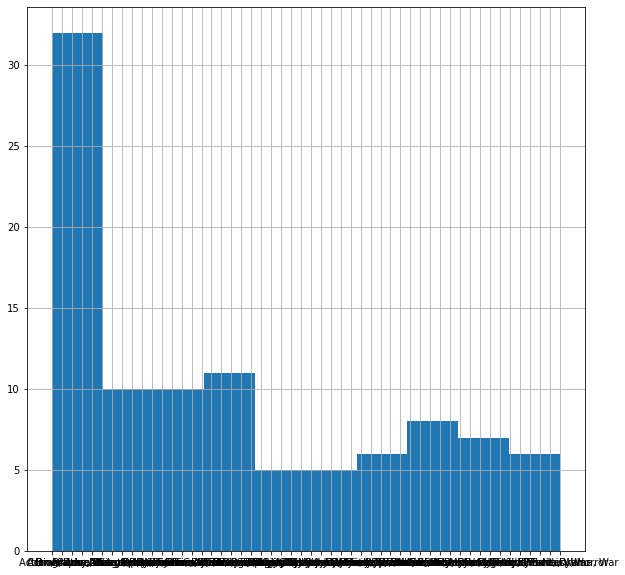

In [49]:
movie_DF['Genra of movie'].hist(figsize=(10,10));

In [59]:
a = movie_DF['Genra of movie'].unique().sum()
a

'DramaCrime, DramaAction, Crime, DramaDrama, WarAction, Adventure, DramaBiography, Drama, HistoryAction, Adventure, Sci-FiAction, Biography, DramaDrama, RomanceWesternAction, Sci-FiBiography, Crime, DramaAction, Adventure, FantasyComedy, Drama, ThrillerCrime, Drama, ThrillerAdventure, Drama, Sci-FiAnimation, Adventure, FamilyCrime, Drama, FantasyComedy, Drama, RomanceCrime, Drama, MysteryAction, Drama, MysteryDrama, Family, FantasyAction, Crime, MysteryDrama, MusicBiography, Comedy, DramaDrama, Mystery, Sci-FiBiography, Drama, MusicCrime, Mystery, ThrillerAnimation, Adventure, DramaAnimation, Drama, WarAdventure, Comedy, Sci-FiHorror, Mystery, ThrillerMystery, ThrillerDrama, Romance, WarComedy, Drama, FamilyAnimation, Drama, FantasyAnimation, Action, AdventureAnimation, Adventure, ComedyDrama, WesternAction, AdventureComedy, DramaDrama, FamilyDrama, Mystery, ThrillerDrama, HorrorDrama, Mystery, WarHorror, Sci-FiComedyDrama, Film-NoirComedy, Drama, WarDrama, Thriller, WarDrama, Fantasy,

In [64]:
movie_DF['Genra of movie'].value_counts()

Drama                           10
Crime, Drama                     6
Action, Adventure, Drama         6
Crime, Drama, Thriller           5
Action, Crime, Drama             4
Crime, Drama, Mystery            3
Biography, Drama, History        3
Drama, War                       3
Comedy, Drama, Romance           3
Animation, Action, Adventure     3
Action, Sci-Fi                   2
Drama, Family                    2
Action, Biography, Drama         2
Action, Drama, Mystery           2
Western                          2
Animation, Adventure, Family     2
Action, Adventure, Sci-Fi        2
Action, Adventure                2
Drama, Mystery, War              2
Action, Adventure, Fantasy       2
Drama, Romance                   2
Mystery, Thriller                2
Comedy                           1
Drama, Family, Fantasy           1
Drama, Mystery, Thriller         1
Biography, Crime, Drama          1
Comedy, Drama, War               1
Horror, Sci-Fi                   1
Adventure, Comedy, S

In [62]:
movie_DF['Director'].value_counts()

Christopher Nolan                    6
Sergio Leone                         3
Francis Ford Coppola                 3
Peter Jackson                        3
Charles Chaplin                      3
                                    ..
Asghar Farhadi                       1
Sidney Lumet                         1
Andrew Stanton                       1
Directors:Aamir Khan, Amole Gupte    1
Todd Phillips                        1
Name: Director, Length: 69, dtype: int64

In [65]:
movie_DF['Star'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Charles Chaplin, Paulette Goddard, Henry Bergman, Tiny Sandford]        1
[Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy]    1
[Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams]          1
[Matthew Broderick, Jeremy Irons, James Earl Jones, Whoopi Goldberg]     1
[Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier]                      1
                                                                        ..
[Madhavan, Vijay Sethupathi, Shraddha Srinath, Kathir]                   1
[Ulrich Mühe, Martina Gedeck, Sebastian Koch, Ulrich Tukur]              1
[Jack Nicholson, Louise Fletcher, Michael Berryman, Peter Brocco]        1
[Eser Sariyar, Çetin Tekindor, Fikret Kuskan, Hümeyra]                   1
[Robert De Niro, James Woods, Elizabeth McGovern, Treat Williams]        1
Name: Star, Length: 100, dtype: int64